# Recap

In [1]:
import pandas as pd

df = pd.read_csv("cars_recap.csv")

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,front,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,front,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,front,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,front,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


## Encoding

👇 Encode the categorical features with pandas' `get_dummies` function. Select the categorical features by their type, rather than by their name.

[`get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [2]:
# Prepare X and y
X = df.drop(columns='price')
y = df['price']

# Check column types
X.dtypes

# Generate masks for categorical features
categorical_features_mask = ~(X.dtypes == 'float64')

# Feature names
categorical_features = X.columns[categorical_features_mask].tolist()

# Encode with get_dummies
X = pd.get_dummies(X, columns = categorical_features)

X.head()

,carwidth,curbweight,stroke,peakrpm,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,64.10000,2548.0,2.68,5000.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,64.10000,2548.0,2.68,5000.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,65.50000,2823.0,3.47,5000.0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,65.88794,2337.0,3.40,5500.0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,66.40000,2824.0,3.40,5500.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


👇 Encode the target

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(df['price'])

## Cook's Distance

👇 Use the Cook Distance outlier detection tool ([documentation](https://www.scikit-yb.org/en/latest/api/regressor/influence.html)) to visualize outlier observations in your dataset.

/Users/krokrob/.pyenv/versions/3.8.5/envs/lewagon385/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


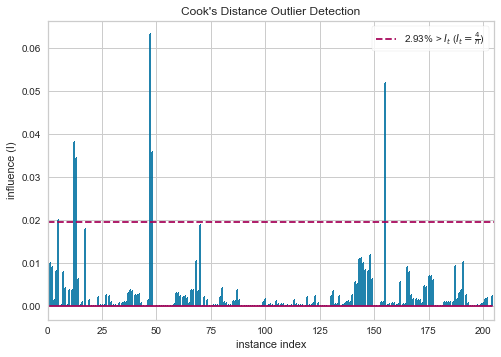

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [13]:
from yellowbrick.regressor import CooksDistance

# Instantiate and fit the visualizer
visualizer = CooksDistance()

# Pass Features and Target
visualizer.fit(X, y)

# Visualize
visualizer.show()

👇 Which observation is the most different from the rest of the dataset?

In [7]:
# Create new column with cook's distance
df['cooks_distance'] = visualizer.distance_

# Most different point in dataset
df.loc[df['cooks_distance'].idxmax()]

aspiration              std
enginelocation        front
carwidth               69.6
curbweight             4066
enginetype             dohc
cylindernumber          six
stroke                 4.17
peakrpm                4750
price             expensive
cooks_distance    0.0631904
Name: 47, dtype: object

👇 Filter out the observations that are above the outlier threshold

In [8]:
# Filter out observations with influence higher than threshold
df = df[df["cooks_distance"] < visualizer.influence_threshold_].reset_index(drop=True)

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,cooks_distance
0,std,front,64.10000,2548.0,dohc,four,2.68,5000.0,expensive,0.010034
1,std,front,64.10000,2548.0,dohc,four,2.68,5000.0,expensive,0.010034
2,std,front,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive,0.009059
3,std,front,65.88794,2337.0,ohc,four,3.40,5500.0,expensive,0.001547
4,std,front,66.40000,2824.0,ohc,five,3.40,5500.0,expensive,0.008242


## Oversampling without leakage

👇 Split the data into train and test sets, and check the class balance of the training set.

In [9]:
from sklearn.model_selection import train_test_split
import collections

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Check class balance
collections.Counter(y_train)

Counter({1: 89, 0: 54})

👇 Use the SMOTE algorithm to oversample and balance the training set.

[SMOTE documentation](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html)

In [14]:
from imblearn.over_sampling import SMOTE

# Instanciate SMOTE
sm = SMOTE()

# Oversample training sets
X_train, y_train = sm.fit_sample(X_train, y_train)

# Check new count
collections.Counter(y_train)

Counter({1: 89, 0: 89})